## Task 2&3
#### Name: Matthew Bentham

Date: 03/10/2022

Version: 1.0

Environment: Python 3 and Jupyter notebook

Libraries used:
* pandas
* numpy
* nltk 
* Scikit-learn
* os
* matplotlib
## Introduction

In this phase of the project, using the tokens processed in *task 1*, multiple feature representations will be created to be then used to generate and compare how each representation effects the accuracy of a machine learning text classification model. This phase can be further segregated into two task:
1. Generating the feature representations (Task 2)
2. Advertisement classification models (Task 3)

<h3><center>TASK 2</center></h1>  
<p><center>Generating Feature Representations for Job Advertisement Descriptions</center></p> 

------------------------------
**TASKS**:
1. **Bag of words**: Generate a count vector representation for each tokenized job advertisment 
2. **Bag of embeddings**:   
    i. Generate vector representations of each token in every document using a pretrained GloVe model  
    ii. Sum each vector representation for every document to generate an unweighted document vector  
    iii. Generate a TF-IDF vector representation for each tokenized job advertisment   
    iv. Multiply each GloVe generated feature representation with its corresponding TF-IDF vector representation and sum the results to generate a weighted document vector 

**INPUTS**:
The output text files in task 1
- **Jobs.txt**: Contains all job decscriptions in a single file (line per description)
- **Vocab.txt**: Contains the unigram vocabulary, in the format *word_string:word_integer_index*
- **webindxs.txt**: Contains a list of all the stored web index values in the same order as the job.txt file 
- **jobtitles.txt**:Contains a list of all the titles in the same order as the job.txt file 
- **jobtypes.txt**:Contains a list of all the job types in the same order as the job.txt file 
- **glove.6B.100d.txt** & **glove.42B.300d.txt**: Pretrained GloVe models   

**OUTPUTS**:
- **count_vectors.txt**: Contains the count vector representation for each document (job advertisement) with the start of each line consisting of *'#:webindex number'* followed by a list of all the count values in the format *'word_integer_index:word_freq'* 

## Importing libraries 

In [1]:
# Code to import libraries as you need in this assessment, e.g.,

from itertools import chain

import pandas as pd
import numpy as np 
import os 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold, GridSearchCV 
import nltk
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.pipeline import Pipeline
from nltk.probability import *




## Reading in Data
All output text files containing the tokenized descriptions , vocab , titles and job types can be imported , as they were all generated in the same order as the original data no sorting needs to occur 

In [2]:


def readfiles(inputpath):
    """Reads text file and save lines to python list 
    """
    outputlist = []
    with open(inputpath,"r",encoding= 'unicode_escape') as f:
        Lines = f.readlines()
        for line in Lines:
            line=line.strip()
            if inputpath =='vocab.txt':
                line=line.split(":")
                line=line[0].strip()
            elif inputpath =='jobs.txt':
                line=line.split(" ")
            else:
                line=line.split("\n")[0]
            outputlist.append(line)
    f.close()
    return outputlist

paths = ['jobs.txt','webindxs.txt','vocab.txt','job_types.txt','jobtitles.txt']
# Generate lists 
tokenised_jobs = readfiles(paths[0])
webindxs =readfiles(paths[1])
labels=readfiles(paths[3])
vocab =readfiles(paths[2])
titles=readfiles(paths[4])

In [3]:
# create dataframe
data={'Web indexs':webindxs,'Category':labels,'Title':titles,'Description':tokenised_jobs}
data=pd.DataFrame(data=data)
data.head()

Web indexs            Category                            Title  \
0   68802053  Accounting_Finance                  FP&A  Blue Chip   
1   70757636  Accounting_Finance  Part time Management Accountant   
2   71356489  Accounting_Finance                    IFA  EMPLOYED   
3   69073629  Accounting_Finance                  Finance Manager   
4   70656648  Accounting_Finance            Management Accountant   

                                         Description  
0  [market, retail, rapid, growth, due, expansion...  
1  [responsible, efficient, running, accounting, ...  
2  [purpose, advice, telephone, leads, supplied, ...  
3  [expanding, recruit, aca, qualified, accountan...  
4  [offers, interesting, part, qualified, finalis...

## 2.1 Bag of words 
Count vector representation is generated for each job advertisement and saved

In [4]:

# Generate count vectors 
cVectorizer = CountVectorizer(analyzer = "word",vocabulary=vocab) # initialise the CountVectorizer
count_features = cVectorizer.fit_transform([' '.join(article) for article in tokenised_jobs])
vocab3 = cVectorizer.get_feature_names()

#Check vocab of cVectorizer
set(vocab) - set(vocab3)

c:\Users\MattJ\anaconda3\envs\Advprograming\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


set()

In [28]:
cVectorizer.fit_transform([' '.join(article) for article in tokenised_jobs])

<776x5158 sparse matrix of type '<class 'numpy.int64'>'
	with 61751 stored elements in Compressed Sparse Row format>



In order to check to see if vector representation is valid i have defined a validator function as seen below:

In [5]:
def validator(data_features, vocab, index, webindxs,titles,tokenised_jobs):
    '''Validates feature representation by showing the tokens and representation side-by-side
    '''
    print("Web index: #"+webindxs[index]) # print out web index
    print("-"*100)
    print("Title: "+titles[index]) # print out job title
    print("-"*100)
    print("Description tokens:",tokenised_jobs[index]) # print out the tokens of the description
    print("-"*100)
    print("Vector representation:\n") # printing the vector representation as format 'word:value' (
                                      

    for word, value in zip(vocab, data_features.toarray()[index]): 
        if value > 0:
            print(word+":"+str(value), end =' ')

In [6]:
validator(count_features,vocab,0, webindxs,titles,tokenised_jobs)

Web index: #68802053
----------------------------------------------------------------------------------------------------
Title: FP&A  Blue Chip
----------------------------------------------------------------------------------------------------
Description tokens: ['market', 'retail', 'rapid', 'growth', 'due', 'expansion', 'add', 'financial', 'planning', 'analyst', 'central', 'central', 'london', 'fantastic', 'newly', 'created', 'driving', 'forward', 'financial', 'planning', 'analysis', 'group', 'reporting', 'directly', 'head', 'fp', 'assist', 'revenue', 'analysis', 'product', 'channel', 'region', 'commercial', 'input', 'review', 'cases', 'presenting', 'proposals', 'approval', 'develop', 'endtoend', 'planning', 'cycle', 'processes', 'lead', 'regional', 'planning', 'processes', 'ensure', 'completeness', 'key', 'channels', 'products', 'finance', 'year', 'strategic', 'plan', 'addition', 'globally', 'regions', 'develop', 'capital', 'investment', 'plan', 'forward', 'thinking', 'confident',

As seen above there doesnt seem to be any obvious errors with the vector representation when sampling the first datapoint

### 2.1.1 Saving outputs
Save the count vector representation as per spectification.
- count_vectors.txt

In [7]:

out_file = open("./count_vectors.txt", 'w')
for ind in range(0, len(webindxs)):
    # write #webindex at the start of each line
    out_file.write("#{}".format(webindxs[ind]))
    for word, value in zip(vocab, count_features.toarray()[ind]): 
        # if the tf-idf value is greater than 0 , output ",vocab_index,count_value" for every word
        if value > 0:
            out_file.write(",{}:{}".format(vocab.index(word),value))
    out_file.write("\n")
out_file.close() # close the file



## 2.2 Bag of emeddings 
Generate weighted and unweighted document feature representations using pre-trained GloVe word embeddings. which are available [here](https://nlp.stanford.edu/projects/glove/), and we will use the 6B vesion here. 




In [8]:

def gen_docVecs(wv,Description,tfidf = []): # generate vector representation for documents
    '''Function to generate document vectors from word vectors and tokens 
        SOURCE: COSC2820 WEEK9 ACT 6
    '''
    DC = pd.DataFrame() # creating empty final dataframe
    #stopwords = nltk.corpus.stopwords.words('english') # removing stop words

    for i in range(0,len(Description)):
        tokens = list(set(Description[i])) # get the list of distinct words of the document

        Current_document = pd.DataFrame()  # creating a temporary dataframe(store value for 1st doc & for 2nd doc remove the details of 1st & proced through 2nd and so on..)
        for w_ind in range(0, len(tokens)): # looping through each word of a single document and spliting through space
            try:
                word = tokens[w_ind]
                word_vec = wv[word] # if word is present in embeddings(goole provides weights associate with words(300)) then proceed
                
                if tfidf != []:
                    word_weight = float(tfidf[i][word])
                else:
                    word_weight = 1
                Current_document = Current_document.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
            except:
                pass
        doc_vector = Current_document.sum() # take the sum of each column(w0, w1, w2,........w300)
        DC = DC.append(doc_vector, ignore_index = True) # append each document value to the final dataframe
    return DC

### 2.2.1 Load Glove model & Create document vectors 
The imported 6B glove model is located in the glove.6B.100d.txt file 


In [9]:
import os 
def loadGloVe(Path):
    '''Function to load GloVe file 
        SOURCE: COSC2820 WEEK9 ACT 6
    '''
    path = os.path.join(Path)

    GloVe_wv = {}
    with open(path, encoding="utf-8") as f:
        for line in f:
            word, coefs = line.split(maxsplit=1)
            coefs = np.fromstring(coefs, "f", sep=" ")
            GloVe_wv[word] = coefs

    print("Found %s word vectors." % len(GloVe_wv))
    return GloVe_wv

In [10]:
# Load in Pretrained model
fPath = "glove.6B.100d.txt"
GloVe_wv = loadGloVe(fPath)

Found 400000 word vectors.


In [11]:

GloVe_dvs = gen_docVecs(GloVe_wv,data['Description']) # generate document embeddings
GloVe_dvs.isna().any().sum() # check whether there is any null values in the document vectors dataframe.

C:\Users\MattJ\AppData\Local\Temp\ipykernel_17056\1280456823.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Current_document = Current_document.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
C:\Users\MattJ\AppData\Local\Temp\ipykernel_17056\1280456823.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Current_document = Current_document.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
C:\Users\MattJ\AppData\Local\Temp\ipykernel_17056\1280456823.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DC = DC.append(doc_vector, ignore_index = True) # append each document value to

0

### 2.2.2 Creating tfidf weighted document embeddings 

In [12]:
def Vocabdict(voc_fname):
    '''Function which extracts indexes and vocab from vocab.txt and inserts into a list of dictionaries
    '''
    voc_Ind=[]
    with open(voc_fname) as vocfile:
        for line in vocfile:
            line =line.strip().split(':')
            voc_Ind.append([line[1],line[0]])        
    return {int(vi[0]):vi[1] for vi in voc_Ind}


# Generates the w_index:word dictionary
voc_fname = './vocab.txt' # path for the vocabulary
voc_dict = Vocabdict(voc_fname)
voc_dict

{0: 'aap',
 1: 'aaron',
 2: 'aat',
 3: 'abb',
 4: 'abenefit',
 5: 'aberdeen',
 6: 'abi',
 7: 'abilities',
 8: 'abreast',
 9: 'abroad',
 10: 'absence',
 11: 'absolute',
 12: 'ac',
 13: 'aca',
 14: 'academic',
 15: 'academy',
 16: 'acca',
 17: 'accept',
 18: 'acceptable',
 19: 'acceptance',
 20: 'accepted',
 21: 'access',
 22: 'accessible',
 23: 'accident',
 24: 'accommodates',
 25: 'accommodation',
 26: 'accomplished',
 27: 'accordance',
 28: 'account',
 29: 'accountabilities',
 30: 'accountability',
 31: 'accountable',
 32: 'accountancy',
 33: 'accountant',
 34: 'accountants',
 35: 'accounting',
 36: 'accounts',
 37: 'accreditation',
 38: 'accredited',
 39: 'accruals',
 40: 'accuracy',
 41: 'accurate',
 42: 'accurately',
 43: 'achievable',
 44: 'achieve',
 45: 'achieved',
 46: 'achievement',
 47: 'achievements',
 48: 'achiever',
 49: 'achieving',
 50: 'acii',
 51: 'acquired',
 52: 'acquisition',
 53: 'acquisitions',
 54: 'act',
 55: 'acting',
 56: 'action',
 57: 'actions',
 58: 'action

In [13]:
# Generate tfidf vector using vocab and fit to tokens 
tVectorizer = TfidfVectorizer(analyzer = "word",vocabulary = vocab) # initialised the TfidfVectorizer
tfidf_features = tVectorizer.fit_transform([' '.join(job) for job in tokenised_jobs]) # generate the tfidf vector representation for all jobs
tfidf_features.shape

(776, 5158)

Validator function is again used to see if the vocab lines up with the weights 

In [14]:
validator(tfidf_features,vocab,0,webindxs,titles,tokenised_jobs)

Web index: #68802053
----------------------------------------------------------------------------------------------------
Title: FP&A  Blue Chip
----------------------------------------------------------------------------------------------------
Description tokens: ['market', 'retail', 'rapid', 'growth', 'due', 'expansion', 'add', 'financial', 'planning', 'analyst', 'central', 'central', 'london', 'fantastic', 'newly', 'created', 'driving', 'forward', 'financial', 'planning', 'analysis', 'group', 'reporting', 'directly', 'head', 'fp', 'assist', 'revenue', 'analysis', 'product', 'channel', 'region', 'commercial', 'input', 'review', 'cases', 'presenting', 'proposals', 'approval', 'develop', 'endtoend', 'planning', 'cycle', 'processes', 'lead', 'regional', 'planning', 'processes', 'ensure', 'completeness', 'key', 'channels', 'products', 'finance', 'year', 'strategic', 'plan', 'addition', 'globally', 'regions', 'develop', 'capital', 'investment', 'plan', 'forward', 'thinking', 'confident',

In order to generate the TF-IDF weights for each word in every document , i first used the function `genwieghts` to create a list of dictionaires containing word:weight for every word in the document

In [15]:
def genweights(tfidf_features, voc_dict):
    tfidf_weights = [] # a list to store the  word:weight dictionaries of documents
    for i in range(0,len(tokenised_jobs)):
        wordweight_dict = {}
        for word, value in zip(vocab, tfidf_features.toarray()[i]): # iterates through each word and tf-idf value for each document 
            if value > 0:
                wordweight_dict[word]=value
        tfidf_weights.append(wordweight_dict)

    return tfidf_weights

# Generate tf-idf weights
tfidf_weights = genweights(tfidf_features, voc_dict)

In [16]:
# Generate weighted vector
weighted_GloVe_dvs = gen_docVecs(GloVe_wv,data['Description'],tfidf_weights)


C:\Users\MattJ\AppData\Local\Temp\ipykernel_17056\1280456823.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Current_document = Current_document.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
C:\Users\MattJ\AppData\Local\Temp\ipykernel_17056\1280456823.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Current_document = Current_document.append(pd.Series(word_vec*word_weight), ignore_index = True) # if word is present then append it to temporary dataframe
C:\Users\MattJ\AppData\Local\Temp\ipykernel_17056\1280456823.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DC = DC.append(doc_vector, ignore_index = True) # append each document value to

<h3><center>TASK 3</center></h1>  
<p><center>Job Advertisement Classification</center></p> 

------------------------------


**TASKS**:
1. **Model comparisons**: Using the document vectors generated in the previous task compare and analysis the effectiveness of each when used to perform document classification
2. **Using different features of the advertisement**:   
    i. Perform text pre-processing on the titles of each job description like seen in task one  
    ii. Create document vectors using pre-processed title tokens with the best performing model in section 1   
    ii. Using the best performing model of section 1 , build classification models using:      
    - Document vectors generated using ONLY title  
    - Document vectors generated using ONLY job description (same as section 1)  
    - Document vectors generated using both job description and title 


**INPUTS**:   
The previously generated document vector representations 
- **count_features**: Count vector representation of each job advertisement 
- **JFT_wv**: Unweighted vector representation of each job advertisement using GloVe vectors
- **weighted_docs_emb**: Weighted vector representation of each job advertisement using GloVe vectors



**OUTPUTS**:
- Analysis and comparisons of all tested models

## 3.1 Model Comparisons
For all subsequent models i choose to use a linear regression model as they are known to perform well for multiclass classification problems. As the purpose of this section is to primarily compare the effect of different feature representations, the indivivdual performance of each model is not as important as their performances in relation to eachother, however i will perform some basic hyperparameter tuning using gridsearch to optimise some of the results.

### 3.1.1 Count Vector Bag-of-words model

In [17]:
def parameter_tuning(cv_method,X_train,y_train):
    # Hyper parameter tuning
    # Setting up the logistic regression  model Pipline 
    pipe_lr = Pipeline(steps=[
                            ('lr', LogisticRegression())])


    # Setting up the parameters to be hyperoptimised
    params_pipe_lr = { 'lr__C':[0.001, 0.01, 0.1, 1,5, 10, 100, 1000], # A high value of C tells the model to give more weight to the training data. A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data
                    'lr__solver':['newton-cg', 'lbfgs', 'liblinear'],#Algorithm to use in the optimization problem
                    'lr__max_iter' : [100, 1000,2500, 5000],# Maximum number of iterations taken for the solvers to converge.
                    'lr__penalty' : ['l1', 'l2', 'elasticnet', 'none']}#Specify the norm of the penalty


    # Using Gridsearch to hyperoptimise the params as well as performing cross validation
    gs_pipe_lr = GridSearchCV(estimator=pipe_lr, 
                            param_grid=params_pipe_lr, 
                            cv=cv_method,
                            refit=True,
                            n_jobs=-2,
                            scoring='f1_micro',   # using f1-micro to evaluate as it is a multiclass classification problem
                            verbose=1) 

    gs_pipe_lr.fit(X_train, y_train)
    print(f'Best Params: {gs_pipe_lr.best_params_}')
    print(f'Best Score: {gs_pipe_lr.best_score_}')
    return gs_pipe_lr


In [18]:
def build_model(model,X_train,y_train,X_test,y_test,cv_method):
    import warnings
    warnings.filterwarnings("ignore")
    #Model 
    lr_model = model
    lr_model.fit(X_train, y_train)
    # Using crossvalidation to evaluate final performance on test set:
    cv_results = cross_val_score(estimator=lr_model,
                                    X=X_test,
                                    y=y_test, 
                                    cv=cv_method, 
                                    scoring='f1_micro')

    # Plotting confusion matrices
    fig,ax=plt.subplots(1,2)
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')] # titles of different versions of the confusion matrix
    categories = sorted(list(set(labels)))
    axs=0
    for title, normalize in titles_options: # for each option, creates the confusion matrix visualzation
        disp = plot_confusion_matrix(lr_model, X_test, y_test,
                                    display_labels=categories,
                                    cmap=plt.cm.Blues,
                                    normalize=normalize,ax=ax[axs]) # create the plot object
        axs+=1
        disp.ax_.set_title(title) # attach the title to the plot

    fig.set_size_inches(23, 12)
    plt.show() # shows the plots


    # Print Cross validation score
    print('Accuracy score: '+str(round(cv_results.mean(),3)))
    return cv_results

In [19]:
# Define CV method for hyperparameter tuning 
cv_method = StratifiedKFold(n_splits=5, shuffle=True, random_state=999)

In [20]:
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_features, labels, list(range(0,len(labels))),test_size=0.33, random_state=999)

In [21]:
# Hyper paramter tuning 
Pipe_Count = parameter_tuning(cv_method,X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Params: {'lr__C': 0.1, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best Score: 0.888293502613891


c:\Users\MattJ\anaconda3\envs\Advprograming\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
960 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\MattJ\anaconda3\envs\Advprograming\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\MattJ\anaconda3\envs\Advprograming\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\MattJ\anaconda3\envs\Advprograming\lib\site-packages\sklearn\linear_model\_logist

**Final Model**

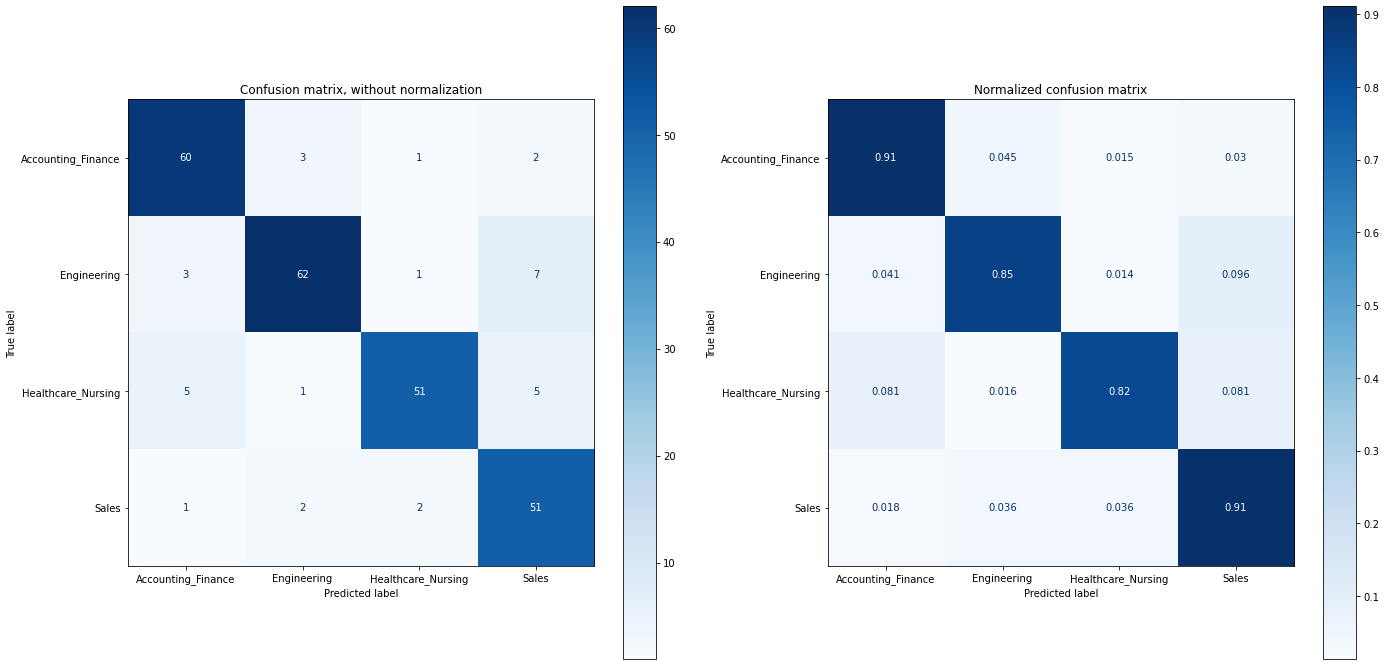

Accuracy score: 0.86


In [30]:
#MODEL:
model_count = LogisticRegression(C=0.1,max_iter=100,penalty='l2',solver='liblinear')
model_count.fit(count_features, labels)
import pickle

with open('CountModel.pkl', 'wb') as fout:
    pickle.dump((cVectorizer, model_count), fout)
count_results= build_model(model_count,X_train,y_train,X_test,y_test,cv_method)



### 3.1.2 Unweighted GloVe Model

In [440]:


# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(GloVe_dvs, labels, list(range(0,len(labels))),test_size=0.33, random_state=999)

In [441]:
# Hyper paramter tuning 
Pipe_GloVe = parameter_tuning(cv_method,X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Params: {'lr__C': 0.001, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best Score: 0.8362957430918595


**FINAL MODEL**

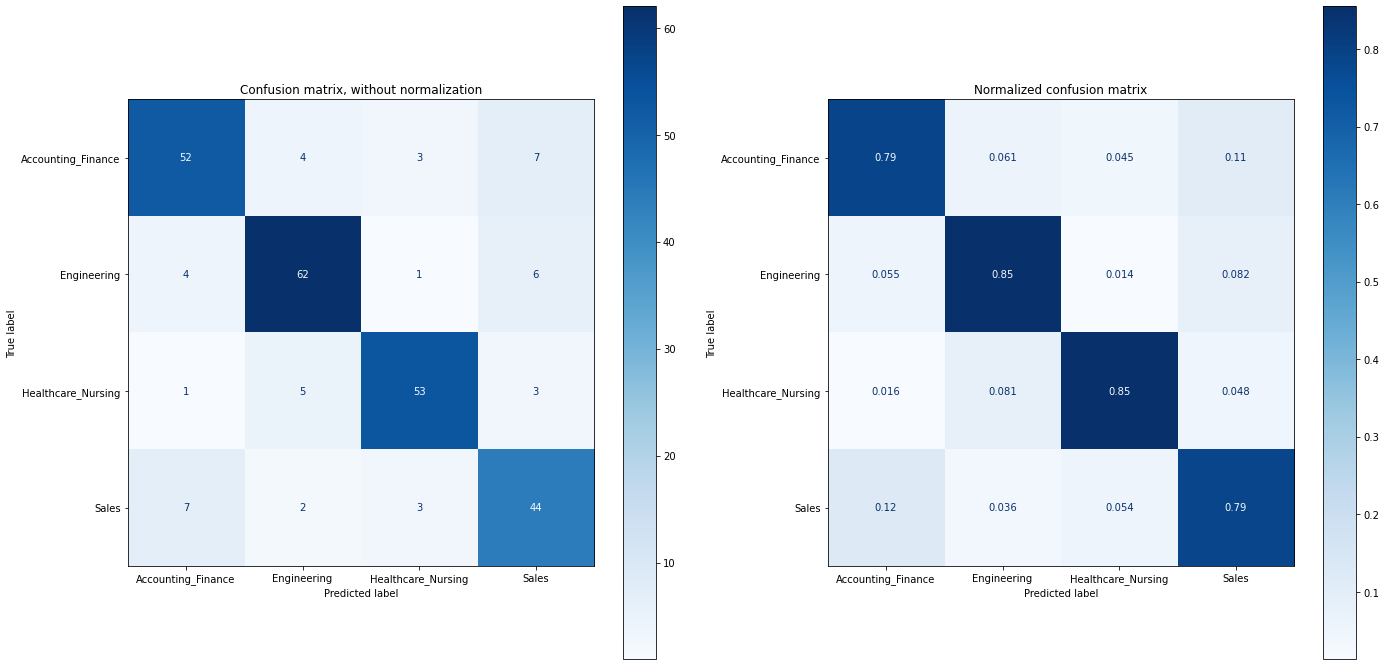

Accuracy score: 0.809


In [442]:
#MODEL:
model_Glove = LogisticRegression(C=0.001,max_iter=100,penalty='l2',solver='liblinear')
Glove_results= build_model(model_Glove,X_train,y_train,X_test,y_test,cv_method)


### 3.1.3 Weighted GloVe Model

In [443]:

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(weighted_GloVe_dvs, labels, list(range(0,len(labels))),test_size=0.33, random_state=999)

In [444]:
# Hyper paramter tuning 
Pipe_GloveWeighted = parameter_tuning(cv_method,X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Params: {'lr__C': 0.01, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'lbfgs'}
Best Score: 0.8709297983569829


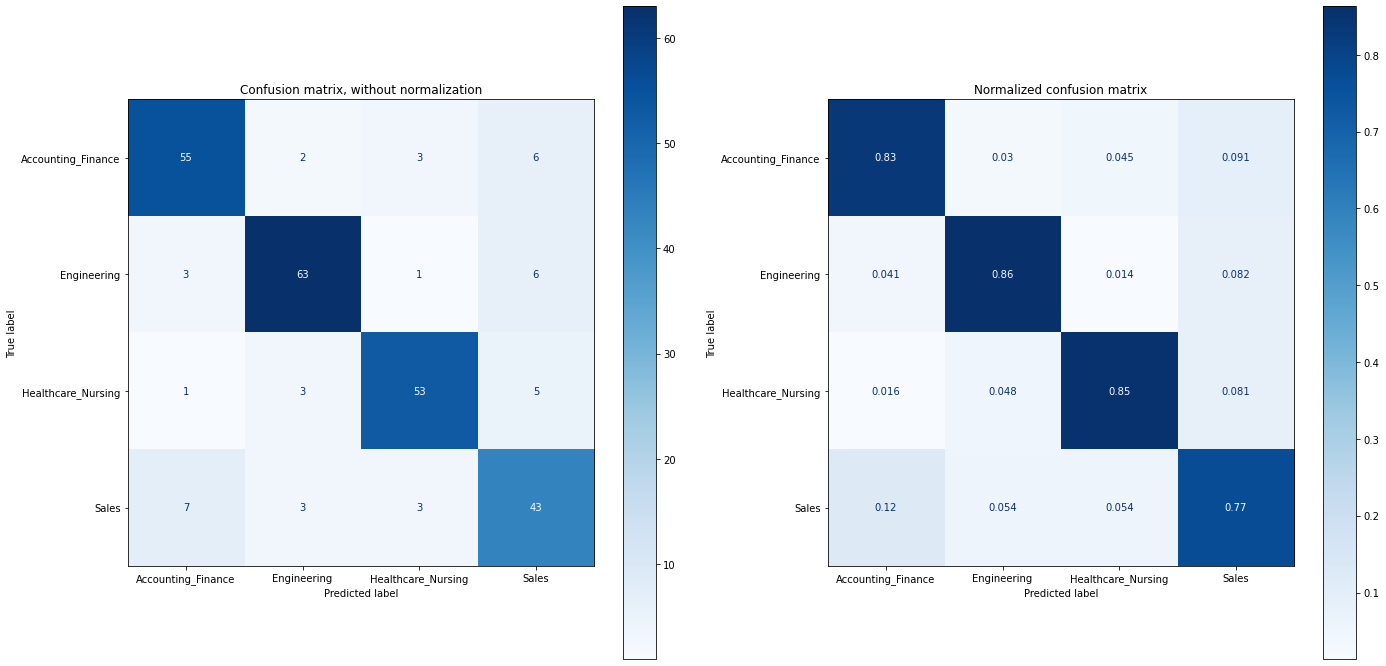

Accuracy score: 0.817


In [445]:
#MODEL:
model_Gloveweighted = LogisticRegression(C=0.01,max_iter=100,penalty='l2',solver='lbfgs')
Gloveweighted_results= build_model(model_Gloveweighted,X_train,y_train,X_test,y_test,cv_method)


### 3.1.4 Comparisons

In [446]:
models = ['Count vector Model','Unweighted GloVe Model','Weighted GloVe Model']
Accuracy = [count_results.mean(),Glove_results.mean(),
Gloveweighted_results.mean()]

summary = pd.DataFrame({'Model': models, 

                        'Accuracy':Accuracy})
summary.sort_values(by = ['Accuracy'], ascending = False, axis = 0, inplace = True)
summary.head()

Model  Accuracy
0      Count vector Model  0.860030
2    Weighted GloVe Model  0.817270
1  Unweighted GloVe Model  0.809427

As seen above the simplest model (Count) seems to have achieved the highest score with an accuracy of 0.86, with the most complex model achieving an accuracy of 0.817 which is still better than the unweighted GloVe model which has an accuracy of 0.81. These results shine a light on the fact that having a more complex model **DOES NOT** guarantee higher performance and in allot of cases the simpler model may be preferred. Additionally, it can also be seen that the addition of the TF-IDF weightings significantly improved the accuracy of the GloVe model. To further improve upon open the models, I would recommend training the embedding language model on a much larger dataset or to finetune the model parameters. 

### 3.1.5 FURTHER TESTING

**Using a larger model**  
For the purposes of demonstrating the effect that having a model trained on a larger dataset has on accuracy i decided to also use the 42B GloVe model.

In [447]:
fPath = "glove.42B.300d.txt"
GloVe2_wv = loadGloVe(fPath)

Found 1917494 word vectors.


In [448]:
GloVe2_dvs = gen_docVecs( GloVe2_wv,data['Description']) # generate document embeddings
GloVe2_dvs.isna().any().sum() # check whether there is any null values in the document vectors dataframe.

0

In [449]:
# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(GloVe2_dvs, labels, list(range(0,len(labels))),test_size=0.33, random_state=999)


In [450]:
# Hyper paramter tuning 
Pipe_Glove2= parameter_tuning(cv_method,X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Params: {'lr__C': 0.001, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best Score: 0.8710231516056759


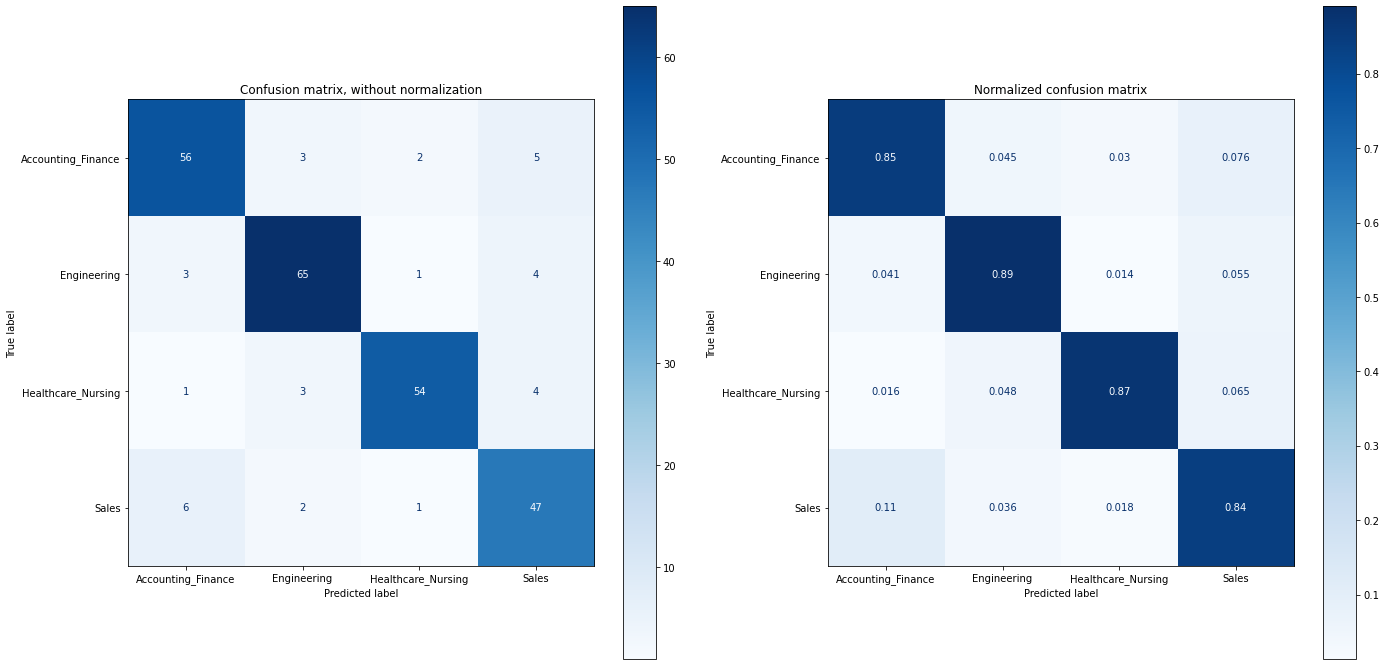

Accuracy score: 0.833


In [451]:
#MODEL:
model_Glove2 = LogisticRegression(C=0.001,max_iter=100,penalty='l2',solver='liblinear')
Glove2_results= build_model(model_Glove2,X_train,y_train,X_test,y_test,cv_method)

As seen above increasing the amount of data the embedding model was trained on is successful in further tuning the model to imporve accuracy. to furhter increase performance i would sugest furhter fine tuning of classifier , increase training size or simply using more sophisticated dynamic word embeddings. 

## 3.2 Using different features of the advertisement

Because the model using the count feature represenation performed the best out of all the models and as it is also the most simple, in order to compare the effect of using job title for text classification,the count model will be used to compare all instances.

### 3.2.1 Text Pre-processing
For the purposes of consistency i will use the same text pre-processing techniques used in task 1 of this project, for more elaboration please refer to `task 1`

*<span style="color: red"> NOTE:</span> I decided not to remove most and least common words due to the nature of titles as this would likely remove a large proportion of the words*


In [452]:
# TOKENZE:---------------------------------------------------------------------------------------------

def tokenizeRawData(article):
    """
        This function tokenizes a raw text document.
    """        
    nl_article = article.lower() # cover all words to lowercase

    pattern = r'''(?x)          
    [a-zA-Z]+(?:[-'][a-zA-Z]+)?       #Regex expression extracts all words including those with - & ' embedded 
    '''
    tokenizer = nltk.RegexpTokenizer(pattern) 
    tokenised_article = tokenizer.tokenize(nl_article)
    return tokenised_article

tokenised_titles = [tokenizeRawData(job) for job in titles] 



# REMOVE SMALL WORDS -----------------------------------------------------------------------------------
tokenised_titles = [[w for w in job if len(w)>=2] \
                      for job in tokenised_titles]
# REMOVE STOP WORDS ------------------------------------------------------------------------------------
stopwords_ = []
with open('./stopwords_en.txt') as f:
    stopwords_ = f.read().splitlines()
# filter out stop words

no_stops =[]
for job in tokenised_titles:
    no_stop = []
    for w in job:
        if w not in stopwords_:
            no_stop.append(w)
            
    no_stops.append(no_stop)
tokenised_titles = no_stops

# Compute VOCAB
words = list(chain.from_iterable(tokenised_titles))# we put all the tokens in the corpus in a single list
vocab = set(words) 

In [453]:
tokenised_titles

[['fp', 'blue', 'chip'],
 ['part', 'time', 'management', 'accountant'],
 ['ifa', 'employed'],
 ['finance', 'manager'],
 ['management', 'accountant'],
 ['customer', 'service', 'administrator'],
 ['accounts', 'assistant'],
 ['pensions', 'administrator'],
 ['senior', 'technical', 'account', 'analyst'],
 ['financial', 'administrator', 'support', 'fleet', 'dept'],
 ['pensions', 'administrator', 'month', 'contract'],
 ['financial', 'accountant'],
 ['senior', 'internal', 'audit'],
 ['mortgage', 'services', 'consultant', 'uk', 'leading', 'estate'],
 ['brokers', 'wanted', 'imediate', 'start'],
 ['risk', 'manager'],
 ['stress', 'testing', 'risk', 'manager', 'nonlife'],
 ['company', 'accountant'],
 ['technical', 'project', 'manager', 'mobile', 'payments'],
 ['pensions', 'administration', 'specialist'],
 ['commercial', 'underwriting', 'motor', 'team', 'leader'],
 ['bookkeeper', 'smt', 'support', 'sage', 'line', 'forecasting'],
 ['dividends', 'corporate', 'actions', 'administrator'],
 ['collection'

In [454]:
tokenised_titles = [[w for w in job if len(w)>=2] \
                      for job in tokenised_titles]

In [455]:
tokenised_titles

[['fp', 'blue', 'chip'],
 ['part', 'time', 'management', 'accountant'],
 ['ifa', 'employed'],
 ['finance', 'manager'],
 ['management', 'accountant'],
 ['customer', 'service', 'administrator'],
 ['accounts', 'assistant'],
 ['pensions', 'administrator'],
 ['senior', 'technical', 'account', 'analyst'],
 ['financial', 'administrator', 'support', 'fleet', 'dept'],
 ['pensions', 'administrator', 'month', 'contract'],
 ['financial', 'accountant'],
 ['senior', 'internal', 'audit'],
 ['mortgage', 'services', 'consultant', 'uk', 'leading', 'estate'],
 ['brokers', 'wanted', 'imediate', 'start'],
 ['risk', 'manager'],
 ['stress', 'testing', 'risk', 'manager', 'nonlife'],
 ['company', 'accountant'],
 ['technical', 'project', 'manager', 'mobile', 'payments'],
 ['pensions', 'administration', 'specialist'],
 ['commercial', 'underwriting', 'motor', 'team', 'leader'],
 ['bookkeeper', 'smt', 'support', 'sage', 'line', 'forecasting'],
 ['dividends', 'corporate', 'actions', 'administrator'],
 ['collection'

### 3.2.2 Creating Vector Representation of Titles 

In [456]:
# Genertate vocab
words = list(chain.from_iterable(tokenised_titles))# we put all the tokens in the corpus in a single list
vocabt = set(words)
vocabt=list(vocabt)

In [457]:
# Generate Count vectors
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocabt)
count_ftitle = cVectorizer.fit_transform([' '.join(article) for article in tokenised_titles])

validator(count_ftitle,vocabt,1, webindxs,titles,tokenised_titles)

Web index: #70757636
----------------------------------------------------------------------------------------------------
Title: Part time Management Accountant
----------------------------------------------------------------------------------------------------
Description tokens: ['part', 'time', 'management', 'accountant']
----------------------------------------------------------------------------------------------------
Vector representation:

management:1 part:1 time:1 accountant:1 

Count vectorization seems to have worked

### 3.2.3 Joining Title and Description Vectors
For the purposes of simplicity in order to test the effect of using both title and job description i will simply join the two vectors together 

In [458]:
# Iterate through tokenised jobs and append the tokenised job titles 
joined_tokenised = []
for i,job in enumerate(tokenised_jobs):
    newlist=job+tokenised_titles[i]
    joined_tokenised.append(newlist)
joined_tokenised

[['market',
  'retail',
  'rapid',
  'growth',
  'due',
  'expansion',
  'add',
  'financial',
  'planning',
  'analyst',
  'central',
  'central',
  'london',
  'fantastic',
  'newly',
  'created',
  'driving',
  'forward',
  'financial',
  'planning',
  'analysis',
  'group',
  'reporting',
  'directly',
  'head',
  'fp',
  'assist',
  'revenue',
  'analysis',
  'product',
  'channel',
  'region',
  'commercial',
  'input',
  'review',
  'cases',
  'presenting',
  'proposals',
  'approval',
  'develop',
  'endtoend',
  'planning',
  'cycle',
  'processes',
  'lead',
  'regional',
  'planning',
  'processes',
  'ensure',
  'completeness',
  'key',
  'channels',
  'products',
  'finance',
  'year',
  'strategic',
  'plan',
  'addition',
  'globally',
  'regions',
  'develop',
  'capital',
  'investment',
  'plan',
  'forward',
  'thinking',
  'confident',
  'qualified',
  'analyst',
  'aca',
  'cima',
  'interpersonal',
  'interest',
  'feel',
  'relevant',
  'call',
  'candidates',
  

In [459]:
# create joined vocab
words = list(chain.from_iterable(joined_tokenised))# we put all the tokens in the corpus in a single list
vocabfull = set(words) 
vocabfull=list(vocabfull)

In [460]:
# Generate and fit count vectors 
cVectorizer = CountVectorizer(analyzer = "word",vocabulary = vocabfull)
count_featuresfull = cVectorizer.fit_transform([' '.join(article) for article in joined_tokenised])

In [461]:
validator(count_featuresfull ,vocabfull,0, webindxs,titles,joined_tokenised)

Web index: #68802053
----------------------------------------------------------------------------------------------------
Title: FP&A  Blue Chip
----------------------------------------------------------------------------------------------------
Description tokens: ['market', 'retail', 'rapid', 'growth', 'due', 'expansion', 'add', 'financial', 'planning', 'analyst', 'central', 'central', 'london', 'fantastic', 'newly', 'created', 'driving', 'forward', 'financial', 'planning', 'analysis', 'group', 'reporting', 'directly', 'head', 'fp', 'assist', 'revenue', 'analysis', 'product', 'channel', 'region', 'commercial', 'input', 'review', 'cases', 'presenting', 'proposals', 'approval', 'develop', 'endtoend', 'planning', 'cycle', 'processes', 'lead', 'regional', 'planning', 'processes', 'ensure', 'completeness', 'key', 'channels', 'products', 'finance', 'year', 'strategic', 'plan', 'addition', 'globally', 'regions', 'develop', 'capital', 'investment', 'plan', 'forward', 'thinking', 'confident',

### 3.2.4 MODELING
####  **Titles**

In [462]:

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_ftitle, labels, list(range(0,len(labels))),test_size=0.33, random_state=999)

In [463]:
# Hyper paramter tuning 
Pipe_title= parameter_tuning(cv_method,X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Params: {'lr__C': 1, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'liblinear'}
Best Score: 0.8189320388349515


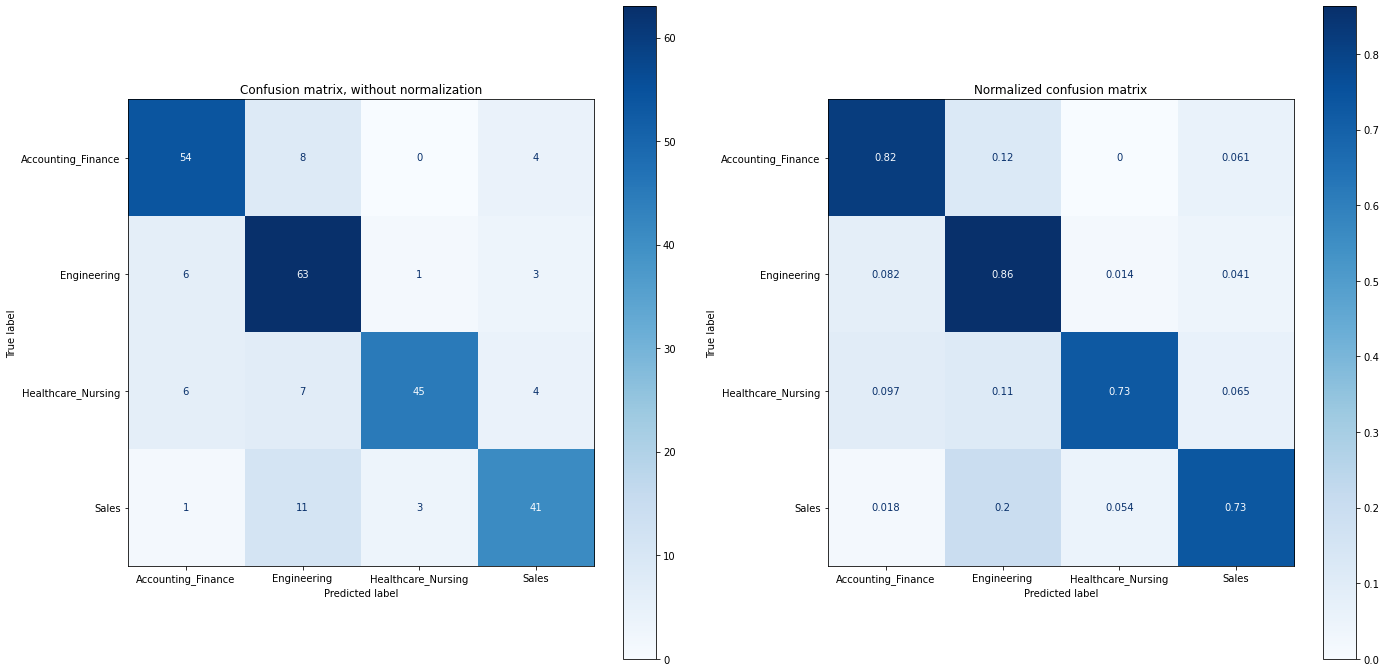

Accuracy score: 0.779


In [464]:
#MODEL:
model_title = LogisticRegression(C=1,max_iter=100,penalty='l2',solver='liblinear')
title_results= build_model(model_title,X_train,y_train,X_test,y_test,cv_method)

####  **Titles + Description**

In [465]:

# creating training and test split
X_train, X_test, y_train, y_test,train_indices,test_indices = train_test_split(count_featuresfull, labels, list(range(0,len(labels))),test_size=0.33, random_state=999)

In [466]:
# Hyper paramter tuning 
Pipe_TD= parameter_tuning(cv_method,X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Params: {'lr__C': 0.1, 'lr__max_iter': 100, 'lr__penalty': 'l2', 'lr__solver': 'newton-cg'}
Best Score: 0.9017923823749067


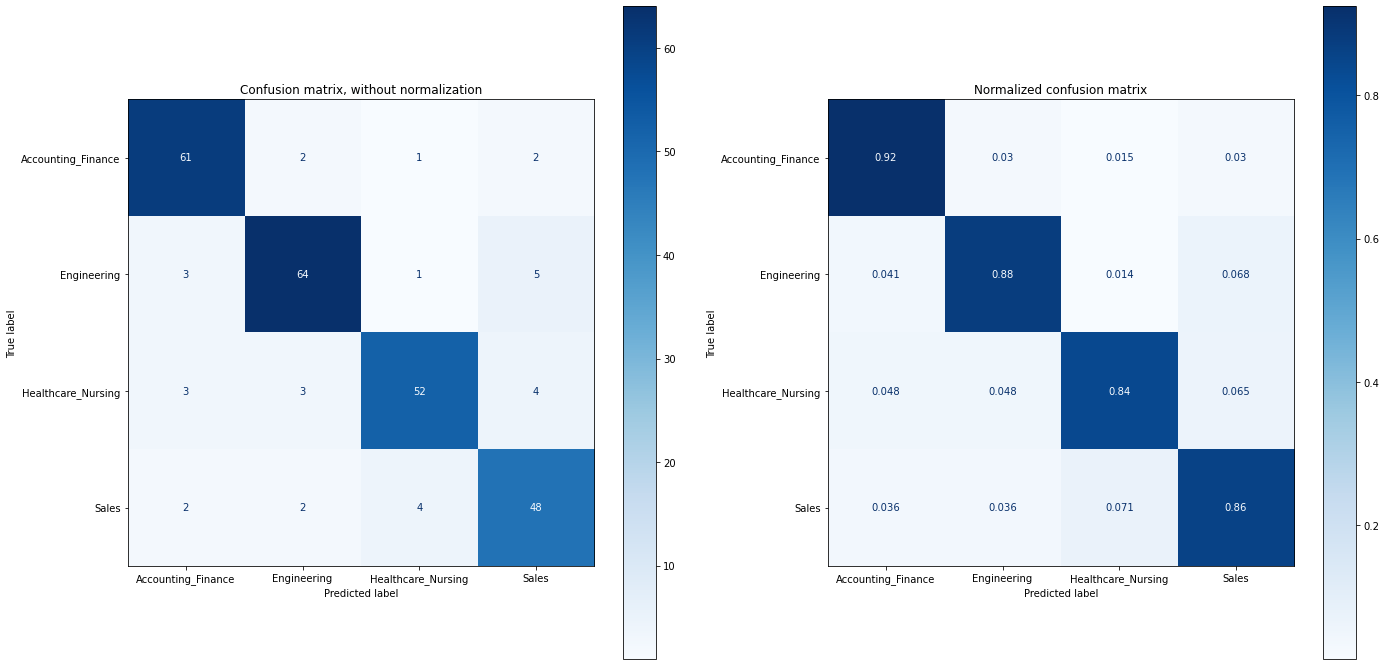

Accuracy score: 0.868


In [467]:
#MODEL:
model_TD = LogisticRegression(C=0.1,max_iter=100,penalty='l2',solver='newton-cg')
TD_results= build_model(model_Glove2,X_train,y_train,X_test,y_test,cv_method)

### 3.2.5 Comparison

In [468]:
models = ['Title','Job description','Title + Job description']
Accuracy = [title_results.mean(),count_results.mean(),TD_results.mean()]

summary = pd.DataFrame({'Model': models, 

                        'Accuracy':Accuracy})
summary.sort_values(by = ['Accuracy'], ascending = False, axis = 0, inplace = True)
summary.head()

Model  Accuracy
2  Title + Job description  0.867722
1          Job description  0.860030
0                    Title  0.778507

As seen in the table above, the model that used the tokenized data from the titles and job description performed the best , with the model that only used the title data performing the worst. This supports the notion that in this case extra information such as title does help boost the accuracy of the model. It can be seen that the title of the advertisements still act as a reltively good indicator for document class, as a value of 0.77 is pretty good for data containing only 3 or 4 words per document. Its important to note that this would not occur in all instances as not all information is helpful when predicting document class. 

## Summary
Overall, this report successfully demonstrates techniques to generate bag-of-word models and bag-of-embedding models using job advertisement text to classify the job type of each advertisement. Throughout model analysis, multiple interesting observations about the effect data size and models used has on the accuracy of the output. The main take-aways from this analysis are as follows: 
*	More complex models **DO NOT** guarantee higher performance, as many complex models rely heavily on large data inputs to train said model. Therefore, models such as these should only be trained using very large amounts of data to achieve significantly better results than a bag of word model.

*	TF-IDF weightings can significantly improve the accuracy of models based on word embeddings , however this not a hard-and-fast rule as TF-IDF values still have their short-cummings. These short-cummings are generally exacerbated in cases with high class imbalances or cases where high frequency words are very predictive of a class. For example, if the word ‘nurse’ appears very often in the healthcare_nursing class, because it is appearing in a large fraction of the documents the word would be strongly supressed by IDF despite its predictive capabilities.

*	More information does not necessarily equate to higher accuracy, however in cases where said information has high predictive capabilities such as title, it can be used effectively to boost performance. 
